genera bati .grd de archivo.mat

In [18]:
from scipy.io import loadmat
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from xyztools import xyz2grid, xyz2grd
import os

In [2]:
#archivo .mat
mat_file=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\CIGIDEN-Batimetrias-v1\CIGIDEN-Batimetrias-v1\V-Vina-Valpo-ConCon-SanAntonio_v3_gebco2019\bat_l2_quin2sano_sinmolo_3sa.mat"
mat_data = loadmat(mat_file) #carga archivo .mat

In [3]:
# ver contenidos (key) del archivo .mat
#por ejemplo para cargar variable 'bat': mat_data['bat']
for key in mat_data.keys():
    print(key,'\t',mat_data[key])

__header__ 	 b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed May 30 00:41:12 2018'
__version__ 	 1.0
__globals__ 	 []
bat 	 [[ 287.5         -32.3        4941.64186028]
 [ 287.5         -32.30083333 4952.59111547]
 [ 287.5         -32.30166667 4963.54037066]
 ...
 [ 288.925       -34.09833333 -566.9867688 ]
 [ 288.925       -34.09916667 -563.24103881]
 [ 288.925       -34.1        -559.49530882]]


In [4]:
#separa en vectores x,y,z
x=mat_data['bat'][:,0]
y=mat_data['bat'][:,1]
z=mat_data['bat'][:,2]

<xarray.Dataset>
Dimensions:  (x: 1711, y: 2161)
Coordinates:
  * x        (x) float64 287.5 287.5 287.5 287.5 ... 288.9 288.9 288.9 288.9
  * y        (y) float64 -32.3 -32.3 -32.3 -32.3 ... -34.1 -34.1 -34.1 -34.1
Data variables:
    z        (y, x) float64 -4.942e+03 -4.933e+03 -4.925e+03 ... 544.0 559.5


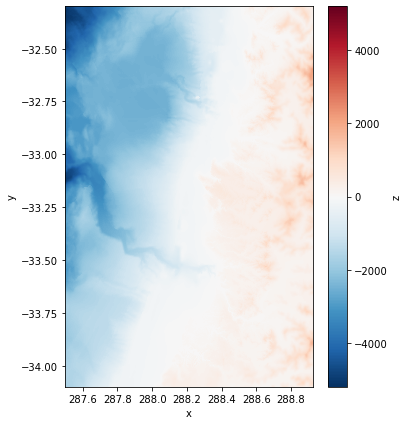

In [5]:
#genera dataset desde vectores x, y, z
grd=xyz2grd(x,y,-z)

print(grd) #muestra info
grd.z.plot.imshow(aspect=grd.dims['x'] / grd.dims['y'],size=7) #plotea

In [6]:
# guarda archivo grd
savedir=r'G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\CIGIDEN-Batimetrias-v1\CIGIDEN-Batimetrias-v1\V-Vina-Valpo-ConCon-SanAntonio_v3_gebco2019'

savename=os.path.splitext(os.path.basename(mat_file))[0] #nombre de archivo es el mismo que el archivo mat original
grd.to_netcdf(os.path.join(savedir,savename+'.grd'),format='NETCDF3_CLASSIC') #guarda el arvhivo con formato grd

### Transforma todos los archivos. mat en una carpeta dada y los guarda como .grd en la misma carpeta

In [19]:
mat_dir=r'G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\CIGIDEN-Batimetrias-v1\CIGIDEN-Batimetrias-v1'

#estas lineas muestran archivos .mat en la carpeta, solo para verificar contenidos
for file in os.listdir(mat_dir):
    if file.endswith(".mat"):
        print(file)

bat_l1_gebco_15sa_chilecont_v4_norte.mat


In [ ]:
for file in os.listdir(mat_dir):
    if file.endswith(".mat"):
        print(file)
        mat_data = loadmat(os.path.join(mat_dir,file))
        
        #separa en vectores x,y,z
        x=mat_data['bat'][:,0]
        y=mat_data['bat'][:,1]
        z=mat_data['bat'][:,2]
        
        grd=xyz2grd(x,y,-z)
        print(grd) #muestra info
        print()
        
        savedir=mat_dir
        savename=os.path.splitext(os.path.basename(file))[0] #nombre de archivo es el mismo que el archivo mat original
        grd.to_netcdf(os.path.join(savedir,savename+'.grd'),format='NETCDF3_CLASSIC') #guarda el arvhivo con formato grd